# Week11 - Clustering Lab

* Create clusters for the following dataset
* Choose a meaningful cluster count
* Identify potential labels for each cluster

In [1]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head(10)

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...
5,Sam Henderson,sam henderson born october 18 1969 is an ameri...
6,Aaron LaCrate,aaron lacrate is an american music producer re...
7,Trevor Ferguson,trevor ferguson aka john farrow born 11 novemb...
8,Grant Nelson,grant nelson born 27 april 1971 in london also...
9,Cathy Caruth,cathy caruth born 1955 is frank h t rhodes pro...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Preprocess text data
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(people['text'])

# Initialize an empty list to store distortions (inertia)
distortions = []

# Choose a range of cluster counts to try
num_clusters_range = range(1, 15)

# Calculate distortion (inertia) for each cluster count
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)  
    kmeans.fit(tfidf_matrix)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(num_clusters_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


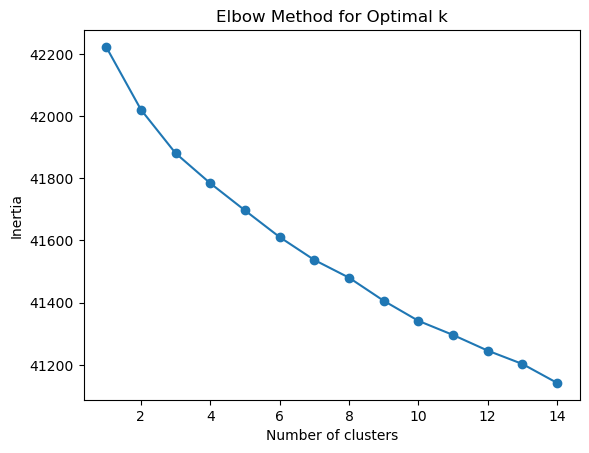

In [10]:
# Determining the optimal number of clusters using the Elbow method
chosen_num_clusters = 8  # Adjust based on the elbow curve plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=chosen_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
people['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Display the cluster labels
for cluster_num in range(chosen_num_clusters):
    print(f"Cluster {cluster_num} labels:")
    print(people.loc[people['cluster'] == cluster_num, 'name'].head(5))
    print("\n")

In [11]:
# Additional exploration of cluster contents
for cluster_num in range(chosen_num_clusters):
    print(f"Cluster {cluster_num} sample text:")
    print(people.loc[people['cluster'] == cluster_num, 'text'].head(1).values)
    print("\n")

Cluster 0 labels:
3     Franz Rottensteiner
5           Sam Henderson
7         Trevor Ferguson
10           Sophie Crumb
11          Jenn Ashworth
Name: name, dtype: object


Cluster 1 labels:
1               Alfred J. Lewy
9                 Cathy Caruth
16              Andrew Pinsent
19         John Angus Campbell
31    Ted Hill (mathematician)
Name: name, dtype: object


Cluster 2 labels:
0                       Digby Morrell
17    Paddy Dunne (Gaelic footballer)
21                      Ceiron Thomas
22                       Adel Sellimi
25                        Vic Stasiuk
Name: name, dtype: object


Cluster 3 labels:
15      Joerg Steineck
40      Timothy Grucza
69           Will Tiao
71    Geoffrey Bayldon
80    Robin MacPherson
Name: name, dtype: object


Cluster 4 labels:
2         Harpdog Brown
4                G-Enka
6         Aaron LaCrate
8          Grant Nelson
18    Alexandros Mouzas
Name: name, dtype: object


Cluster 5 labels:
14    David Chernushenko
32       Mindauga

In [12]:
# Additional exploration of cluster contents
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num} sample text:")
    print(people.loc[people['cluster'] == cluster_num, 'text'].head(1).values)
    print("\n")


Cluster 0 sample text:
['franz rottensteiner born in waidmannsfeld lower austria austria on 18 january 1942 is an austrian publisher and critic in the fields of science fiction and the fantasticrottensteiner studied journalism english and history at the university of vienna receiving his doctorate in 1969 he served about fifteen years as librarian and editor at the sterreichisches institut fr bauforschung in vienna in addition he produced a number of translations into german of leading sf authors including herbert w franke stanislaw lem philip k dick kobo abe cordwainer smith brian w aldiss and the strugatski brothersin 1973 his new york anthology view from another shore of european science fiction introduced a number of continental authors to the englishreading public some of the authors in the work are stanislaw lem josef nesvadba gerard klein and jeanpierre andrevonthe year 1975 saw the start of his series die phantastischen romane for seven years it republished works of both lesser